In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
DataFrame=pd.read_csv('heart.csv')
DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
DataFrame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Cleaning

In [4]:
DataFrame1=DataFrame.dropna()
DataFrame1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
DataFrame2=DataFrame1.replace('?',pd.NA)
DataFrame2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
DataFrame=DataFrame2[DataFrame2>=0]
DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Error Correcting

In [7]:
DataFrame.std()

age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64

In [8]:
DataFrame.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [9]:
Out=np.abs((DataFrame-DataFrame.mean())/DataFrame.std())
lier=Out>3
print(lier.sum())
DataFrame=DataFrame[~lier.any(axis=1)]
DataFrame

age          0
sex          0
cp           0
trestbps     7
chol        13
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca          18
thal         7
target       0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Transformation

In [10]:
DataFrame.loc[DataFrame['sex']==1,'sex']='M'
DataFrame.loc[DataFrame['sex']==0,'sex']='F'
lb=LabelEncoder()
DataFrame['sex']=lb.fit_transform(DataFrame['sex'])
DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Models

In [11]:
X=DataFrame.drop('target',axis=1)
Y=DataFrame['target']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=46)

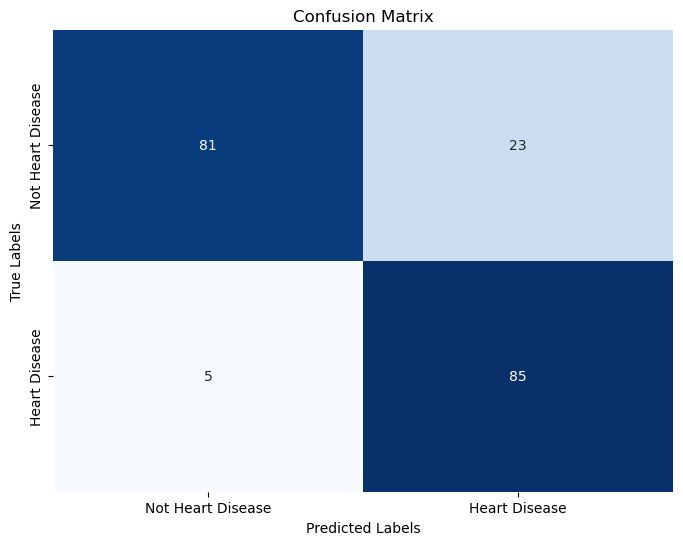

In [13]:
reg=LogisticRegression()
reg.fit(X_train,Y_train)
# Make predictions on the testing set
Y_pred = reg.predict(X_test)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Heart Disease", "Heart Disease"],
            yticklabels=["Not Heart Disease", "Heart Disease"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

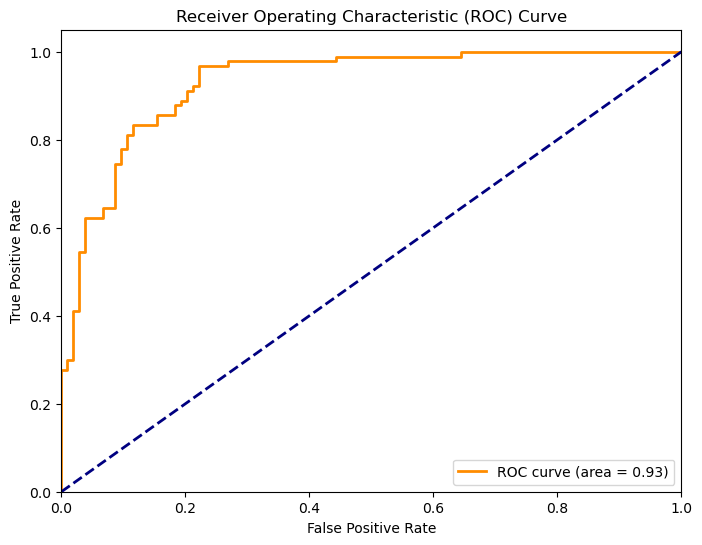

In [14]:
# Plot ROC curve
Y_prob = reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
X_train.shape

(775, 13)

In [16]:
Y_train.shape

(775,)

In [17]:
r1=reg.predict(X_test)
r1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

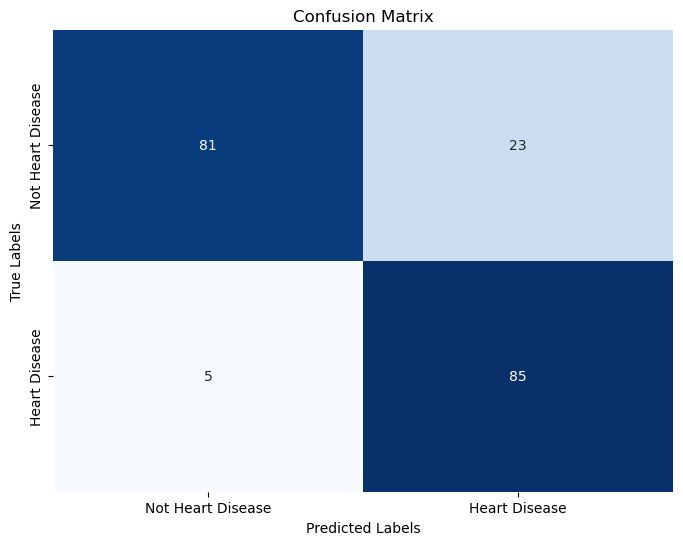

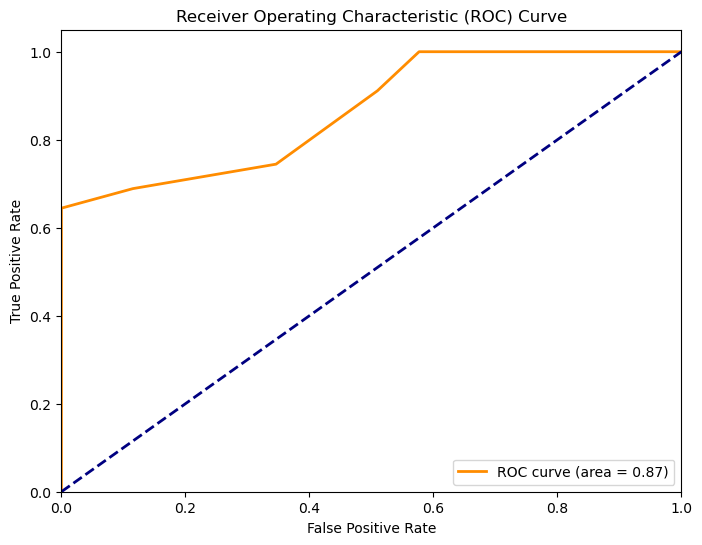

In [18]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Plot Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Heart Disease", "Heart Disease"],
            yticklabels=["Not Heart Disease", "Heart Disease"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
Y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
r2=knn.predict(X_test)
r2

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [20]:
acc1=accuracy_score(Y_test,r1)
acc2=accuracy_score(Y_test,r2)

In [21]:
print("Regression accuracy: ",acc1)
print("kNN accuracy: ",acc2)

Regression accuracy:  0.8556701030927835
kNN accuracy:  0.6958762886597938


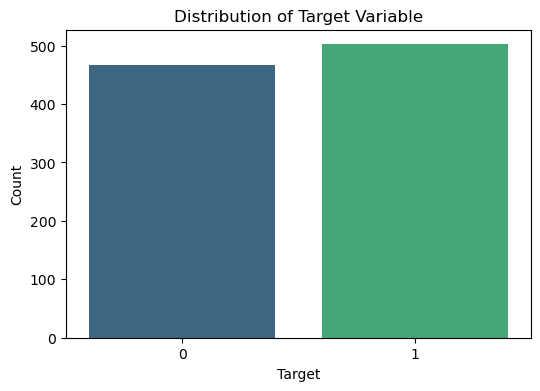

In [22]:
# Histogram of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=DataFrame, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


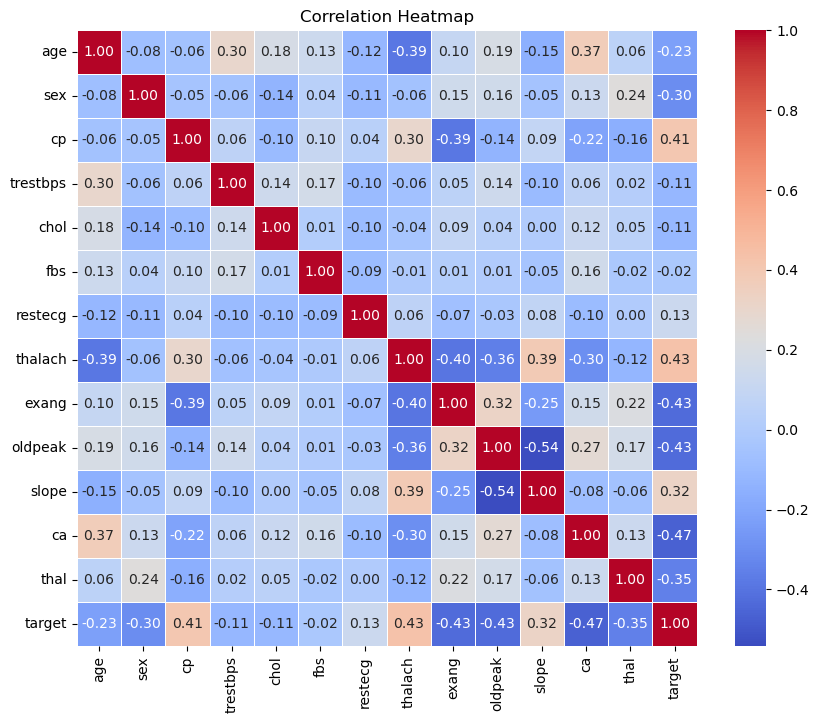

In [23]:
# Heatmap of Feature Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(DataFrame.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

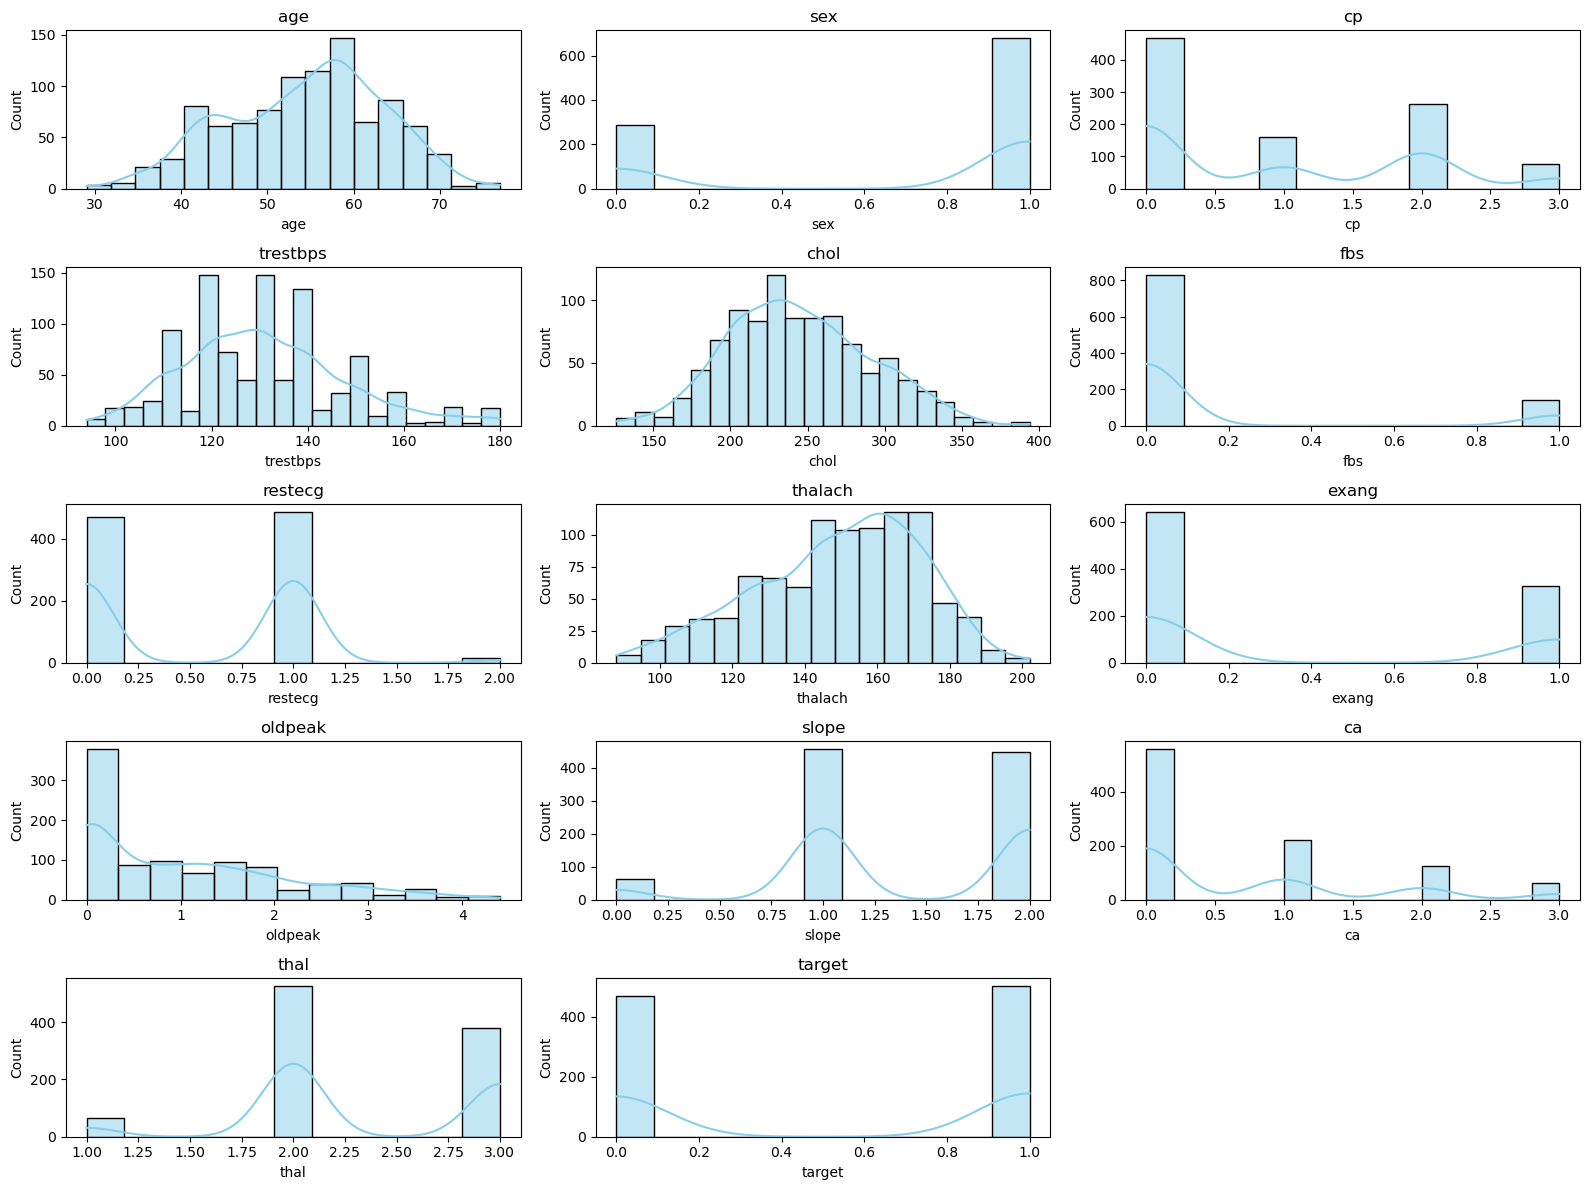

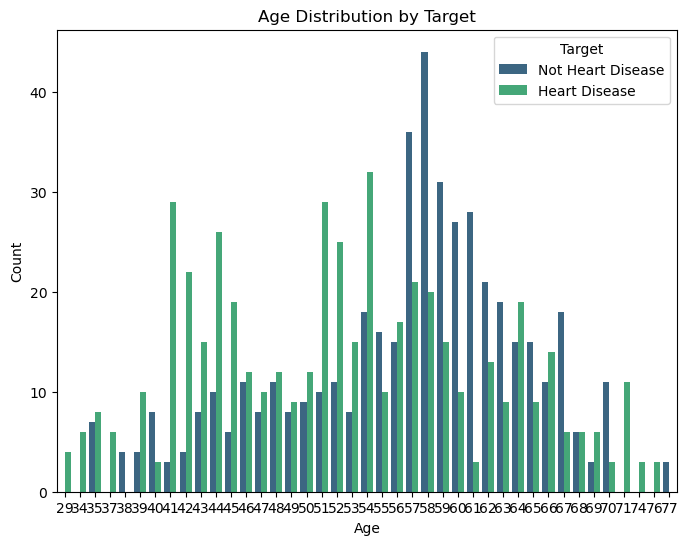

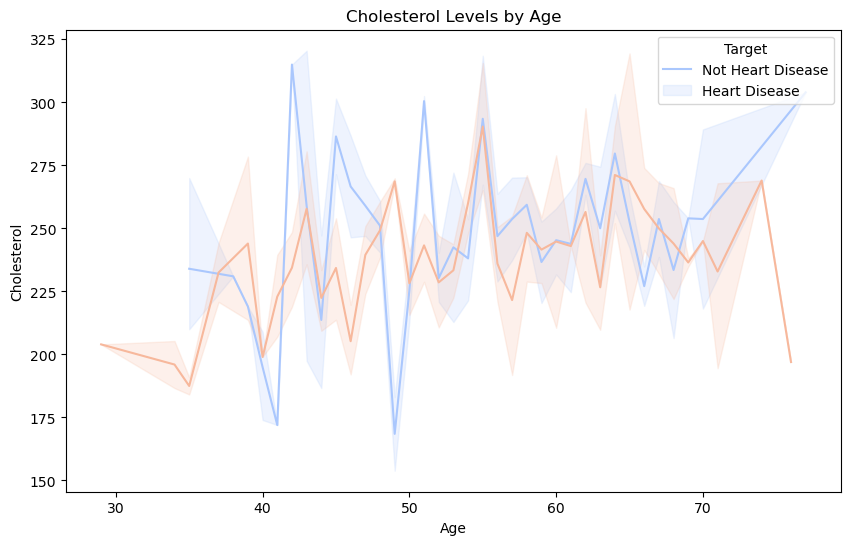

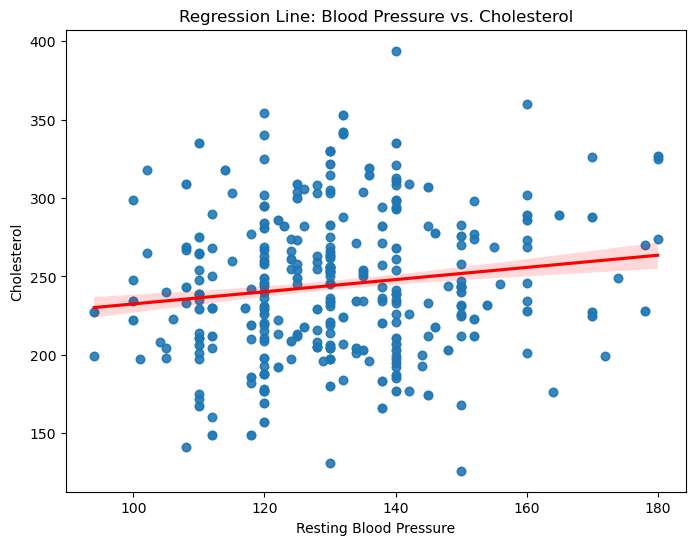

In [24]:
# Histograms of Numerical Features
numerical_features = DataFrame.select_dtypes(include=[np.number])

# Determine the number of rows and columns for subplots
num_rows = (len(numerical_features.columns) - 1) // 3 + 1
num_cols = min(len(numerical_features.columns), 3)

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data=numerical_features, x=col, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


# Bar Graph for Age Distribution by Target
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='target', data=DataFrame, palette='viridis')
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['Not Heart Disease', 'Heart Disease'])
plt.show()

# Line Plot of Cholesterol Levels
plt.figure(figsize=(10, 6))
sns.lineplot(data=DataFrame, x='age', y='chol', hue='target', palette='coolwarm')
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target', loc='upper right', labels=['Not Heart Disease', 'Heart Disease'])
plt.show()

# Regression Line for Blood Pressure vs. Cholesterol
plt.figure(figsize=(8, 6))
sns.regplot(data=DataFrame, x='trestbps', y='chol', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Line: Blood Pressure vs. Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.show()


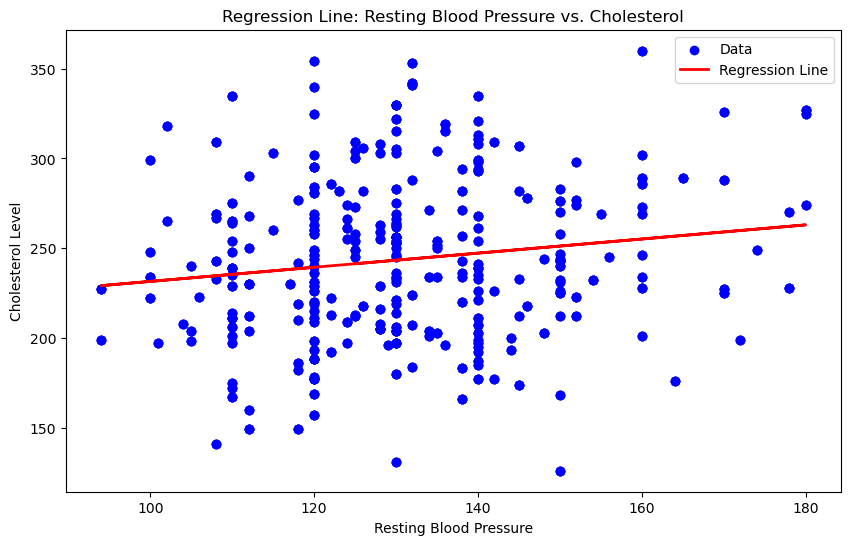

Coefficient of determination (R^2): 0.02174627358410175


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Remove outliers from the dataset
cleaned_df = DataFrame.copy()  # Make a copy to preserve the original DataFrame
cleaned_df = cleaned_df[(np.abs(cleaned_df - cleaned_df.mean()) / cleaned_df.std()) < 3].dropna()

# Fit a linear regression model
X_reg = cleaned_df[['trestbps']]  # Feature (X) is resting blood pressure
y_reg = cleaned_df['chol']        # Target variable (y) is cholesterol level

regression_model = LinearRegression()
regression_model.fit(X_reg, y_reg)

# Predictions using the regression model
y_pred_reg = regression_model.predict(X_reg)

# Plot the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Data')
plt.plot(X_reg, y_pred_reg, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line: Resting Blood Pressure vs. Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()

# Calculate the coefficient of determination (R^2) as a measure of accuracy
r_squared = r2_score(y_reg, y_pred_reg)
print("Coefficient of determination (R^2):", r_squared)
